In [1]:
import os, sys
current = os.path.dirname(os.path.realpath('__file__'))
parent = os.path.dirname(current)
sys.path.append(parent)

import math
import copy
import random
import statistics
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.stats import kendalltau

from helpers import *  

### Question 2

In [2]:
def compute_proxy_betweenness_centrality(digraph):
    """Takes a directed graph and computes the proxy betweenness centrality for the nodes in the graph. 
    Returns a dictionary with the same set of keys (nodes) and their proxy betweenness centrality."""
    degrees = compute_degrees(digraph)
    neighbourhoods = compute_neighbourhoods(digraph)
    clustering_coefficients = compute_local_clustering_coefficients(digraph, neighbourhoods)
    centrality = {v: degrees[v]*(1-clustering_coefficients[v]) for v in digraph.keys()}
    return centrality

def compute_betweenness_centrality(digraph):
    """Takes a directed graph and computes the betweenness centrality for the nodes in the graph. 
    Returns a dictionary with the same set of keys (nodes) and their betweenness centrality."""
    g = nx.Graph(digraph)
    centrality = nx.betweenness_centrality(g, k=100)
    return centrality

100%|██████████| 27770/27770 [00:11<00:00, 2404.23it/s]


0.008106992259308464
5.822738354402773
KendalltauResult(correlation=0.0010108785947650066, pvalue=0.8108042581921597)


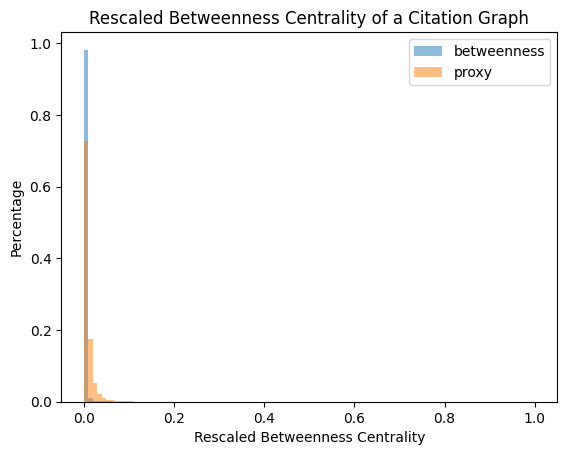

100%|██████████| 27770/27770 [00:03<00:00, 7855.15it/s] 


0.001554097326617277
3.4267522379809203
KendalltauResult(correlation=0.20626879664013442, pvalue=0.0)


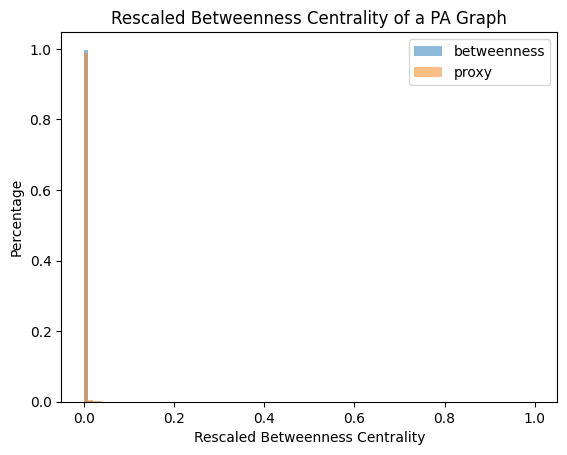

100%|██████████| 1202/1202 [00:00<00:00, 3833.72it/s]


0.04869595609344791
3.360349491431634
KendalltauResult(correlation=0.3983992817965062, pvalue=4.3918553238916776e-95)


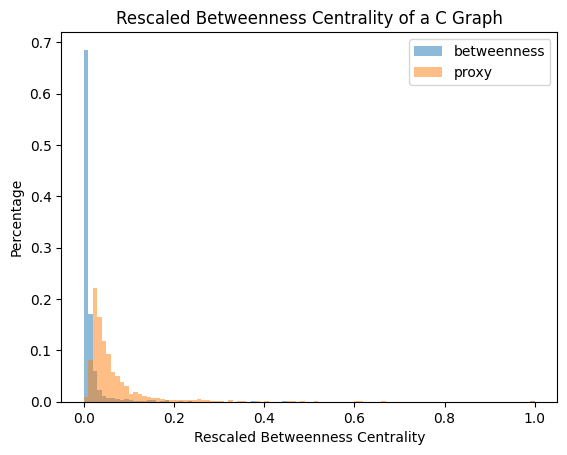

In [3]:
citation_graph = load_graph(parent + "/networks/alg_phys-cite.txt")
betweenness_centrality = compute_betweenness_centrality(citation_graph)
proxy_betweenness_centrality = compute_proxy_betweenness_centrality(citation_graph)
normalised_betweenness_centrality = {k: (v-min(betweenness_centrality.values()))/(max(betweenness_centrality.values())-min(betweenness_centrality.values())) for k,v in betweenness_centrality.items()}
normalised_proxy_betweenness_centrality = {k: (v-min(proxy_betweenness_centrality.values()))/(max(proxy_betweenness_centrality.values())-min(proxy_betweenness_centrality.values())) for k,v in proxy_betweenness_centrality.items()}
rmse = sum([math.sqrt((b-a)**2) for a,b in zip(normalised_betweenness_centrality.values(), normalised_proxy_betweenness_centrality.values())])/len(citation_graph)
si = rmse/statistics.mean(normalised_betweenness_centrality.values())
print(rmse)
print(si)

sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1]) if v != 0}
sorted_proxy_betweenness_centrality = {k: v for k, v in sorted(proxy_betweenness_centrality.items(), key=lambda item: item[1]) if v != 0}
sorted_betweenness_centrality = {k: v for k, v in sorted_betweenness_centrality.items() if k in sorted_proxy_betweenness_centrality.keys()}
sorted_proxy_betweenness_centrality = {k: v for k, v in sorted_proxy_betweenness_centrality.items() if k in sorted_betweenness_centrality.keys()}
kdt = kendalltau(list(sorted_betweenness_centrality.keys()), list(sorted_proxy_betweenness_centrality.keys()))
print(kdt)

plt.hist(normalised_betweenness_centrality.values(), bins=100, alpha=0.5, label='betweenness', weights=np.ones(len(citation_graph))/len(citation_graph))
plt.hist(normalised_proxy_betweenness_centrality.values(), bins=100, alpha=0.5, label='proxy', weights=np.ones(len(citation_graph))/len(citation_graph))
plt.title('Rescaled Betweenness Centrality of a Citation Graph')
plt.xlabel('Rescaled Betweenness Centrality')
plt.ylabel('Percentage')
plt.legend()
plt.show()


EX_GRAPH_PA1 = make_PA_Graph(27770, 13)
betweenness_centrality = compute_betweenness_centrality(EX_GRAPH_PA1)
proxy_betweenness_centrality = compute_proxy_betweenness_centrality(EX_GRAPH_PA1)
normalised_betweenness_centrality = {k: (v-min(betweenness_centrality.values()))/(max(betweenness_centrality.values())-min(betweenness_centrality.values())) for k,v in betweenness_centrality.items()}
normalised_proxy_betweenness_centrality = {k: (v-min(proxy_betweenness_centrality.values()))/(max(proxy_betweenness_centrality.values())-min(proxy_betweenness_centrality.values())) for k,v in proxy_betweenness_centrality.items()}
rmse = sum([math.sqrt((b-a)**2) for a,b in zip(normalised_betweenness_centrality.values(), normalised_proxy_betweenness_centrality.values())])/len(EX_GRAPH_PA1)
si = rmse/statistics.mean(normalised_betweenness_centrality.values())
print(rmse)
print(si)

sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1]) if v != 0}
sorted_proxy_betweenness_centrality = {k: v for k, v in sorted(proxy_betweenness_centrality.items(), key=lambda item: item[1]) if v != 0}
sorted_betweenness_centrality = {k: v for k, v in sorted_betweenness_centrality.items() if k in sorted_proxy_betweenness_centrality.keys()}
sorted_proxy_betweenness_centrality = {k: v for k, v in sorted_proxy_betweenness_centrality.items() if k in sorted_betweenness_centrality.keys()}
kdt = kendalltau(list(sorted_betweenness_centrality.keys()), list(sorted_proxy_betweenness_centrality.keys()))
print(kdt)

plt.hist(normalised_betweenness_centrality.values(), bins=100, alpha=0.5, label='betweenness', weights=np.ones(len(EX_GRAPH_PA1))/len(EX_GRAPH_PA1))
plt.hist(normalised_proxy_betweenness_centrality.values(), bins=100, alpha=0.5, label='proxy', weights=np.ones(len(EX_GRAPH_PA1))/len(EX_GRAPH_PA1))
plt.title('Rescaled Betweenness Centrality of a PA Graph')
plt.xlabel('Rescaled Betweenness Centrality')
plt.ylabel('Percentage')
plt.legend()
plt.show()


C_graph, _ = make_C_Graph(2000, 20, 0.7, 0.1, 0.1, 0.1)
betweenness_centrality = compute_betweenness_centrality(C_graph)
proxy_betweenness_centrality = compute_proxy_betweenness_centrality(C_graph)
normalised_betweenness_centrality = {k: (v-min(betweenness_centrality.values()))/(max(betweenness_centrality.values())-min(betweenness_centrality.values())) for k,v in betweenness_centrality.items()}
normalised_proxy_betweenness_centrality = {k: (v-min(proxy_betweenness_centrality.values()))/(max(proxy_betweenness_centrality.values())-min(proxy_betweenness_centrality.values())) for k,v in proxy_betweenness_centrality.items()}
rmse = sum([math.sqrt((b-a)**2) for a,b in zip(normalised_betweenness_centrality.values(), normalised_proxy_betweenness_centrality.values())])/len(C_graph)
si = rmse/statistics.mean(normalised_betweenness_centrality.values())
print(rmse)
print(si)

sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1]) if v != 0}
sorted_proxy_betweenness_centrality = {k: v for k, v in sorted(proxy_betweenness_centrality.items(), key=lambda item: item[1]) if v != 0}
sorted_betweenness_centrality = {k: v for k, v in sorted_betweenness_centrality.items() if k in sorted_proxy_betweenness_centrality.keys()}
sorted_proxy_betweenness_centrality = {k: v for k, v in sorted_proxy_betweenness_centrality.items() if k in sorted_betweenness_centrality.keys()}
kdt = kendalltau(list(sorted_betweenness_centrality.keys()), list(sorted_proxy_betweenness_centrality.keys()))
print(kdt)

plt.hist(normalised_betweenness_centrality.values(), bins=100, alpha=0.5, label='betweenness', weights=np.ones(len(C_graph))/len(C_graph))
plt.hist(normalised_proxy_betweenness_centrality.values(), bins=100, alpha=0.5, label='proxy', weights=np.ones(len(C_graph))/len(C_graph))
plt.title('Rescaled Betweenness Centrality of a C Graph')
plt.xlabel('Rescaled Betweenness Centrality')
plt.ylabel('Percentage')
plt.legend()
plt.show()